**This API call shows the flights in Italian airspace in real time ( to see them worldwide, run the cell without the Italian coordinates )**

In [1]:
import numpy as np
import pandas as pd
import requests

In [2]:
url = "https://opensky-network.org/api/states/all?lamin=35.0&lamax=47.5&lomin=6.5&lomax=19.0"   # only for Italy


In [3]:
# url = "https://opensky-network.org/api/states/all"   # for all the World

In [4]:
r = requests.get(url)

In [5]:
if r.status_code == 200:
    try:
        data = r.json()
    except json.JSONDecodeError:
        print("Error, invalid JSON response")
    else:
        print('Valid JSON response received')    
else:
    print("Error in request:", r.status_code)

Valid JSON response received


In [6]:
print(data)

{'time': 1761515467, 'states': [['471eff', 'WMT991  ', 'Hungary', 1761515369, 1761515380, 8.7233, 45.6158, None, True, 9.26, 168.75, None, None, None, '0415', False, 0], ['3c5ef6', 'EWG5202 ', 'Germany', 1761515467, 1761515467, 8.0752, 44.4197, 11590.02, False, 218.4, 21.12, -0.65, None, 11643.36, '0452', False, 0], ['471f87', 'WZZ4KP  ', 'Hungary', 1761515466, 1761515466, 9.4217, 41.3955, 10965.18, False, 264.05, 77.97, 0.33, None, 11155.68, '1444', False, 0], ['471f6b', 'WMT3AD  ', 'Hungary', 1761515466, 1761515467, 8.6486, 45.2198, 11117.58, False, 247.68, 92.5, 2.93, None, 11125.2, '4061', False, 0], ['471f6c', 'WMT8HS  ', 'Hungary', 1761515466, 1761515466, 10.2271, 45.1498, 6454.14, False, 205.21, 122.61, 9.1, None, 6446.52, '0440', False, 0], ['471f68', 'WMT5ZL  ', 'Hungary', 1761515466, 1761515467, 17.7903, 44.5846, 10660.38, False, 278.01, 84.58, 0, None, 10675.62, '0420', False, 0], ['471f69', 'WMT6CV  ', 'Hungary', 1761515467, 1761515467, 13.5026, 45.6002, 10668, False, 257.2

In [7]:
type(r.json())

dict

In [8]:
print(data.keys())

dict_keys(['time', 'states'])


In [9]:
from datetime import datetime
t = data['time']
print("Real time:", datetime.fromtimestamp(t))

Real time: 2025-10-26 22:51:07


In [10]:
airplane = data['states'][0]
print(airplane)

['471eff', 'WMT991  ', 'Hungary', 1761515369, 1761515380, 8.7233, 45.6158, None, True, 9.26, 168.75, None, None, None, '0415', False, 0]


In [11]:
df = pd.DataFrame(data['states'], columns= ("icao24", "callsign", "origin_country", "time_position", "last_contact", # queste colonne le ho trovate sul sito
    "longitude", "latitude", "baro_altitude", "on_ground", "velocity",
    "heading", "vertical_rate", "sensors", "geo_altitude",
    "squawk", "spi", "position_source"))
df.shape

(319, 17)

In [12]:
df['real_time'] = datetime.fromtimestamp(t)

In [13]:
t1 = pd.DataFrame([{"real_time": (t)}])

In [14]:
df = pd.concat([t1,df])
df.sample(10)

,real_time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
220,2025-10-26 22:51:07,484b8f,KLM99H,Kingdom of the Netherlands,1.761515e+09,1.761515e+09,7.2072,43.6600,NaN,True,0.00,258.75,NaN,None,NaN,1000,False,0.0
46,2025-10-26 22:51:07,346614,VOE3GT,Spain,1.761515e+09,1.761515e+09,11.1571,42.3162,8359.14,False,198.65,316.05,6.18,None,8435.34,None,False,0.0
151,2025-10-26 22:51:07,4b0294,SWR3PD,Switzerland,1.761515e+09,1.761515e+09,8.7199,45.6246,NaN,True,0.51,78.75,NaN,None,NaN,1000,False,0.0
306,2025-10-26 22:51:07,4b18f3,EDW135F,Switzerland,1.761515e+09,1.761515e+09,8.8812,47.4339,1851.66,False,80.27,276.62,-2.93,None,1889.76,1000,False,0.0
152,2025-10-26 22:51:07,4951d7,TAP934,Portugal,1.761515e+09,1.761515e+09,8.7619,47.4429,1287.78,False,68.85,276.43,-4.23,None,1333.50,1000,False,0.0
90,2025-10-26 22:51:07,040243,ETH701,Ethiopia,1.761515e+09,1.761515e+09,11.0652,46.8168,10668.00,False,274.93,138.95,-0.33,None,10591.80,0263,False,0.0
234,2025-10-26 22:51:07,717ca8,KNE664,Saudi Arabia,1.761515e+09,1.761515e+09,15.1265,35.7171,11277.60,False,263.02,97.42,0.00,None,11742.42,None,False,0.0
61,2025-10-26 22:51:07,345102,VLG9TB,Spain,1.761515e+09,1.761515e+09,8.8350,45.9163,10660.38,False,246.92,147.77,0.65,None,10637.52,2705,False,0.0
67,2025-10-26 22:51:07,406666,EZY62YE,United Kingdom,1.761515e+09,1.761515e+09,8.4570,46.9966,10980.42,False,208.91,296.00,-0.33,None,10957.56,2746,False,0.0
274,2025-10-26 22:51:07,4c01f2,ASL82G,Serbia,1.761515e+09,1.761515e+09,17.1712,44.8070,10058.40,False,266.99,93.54,0.00,None,10050.78,4143,False,0.0


In [15]:
df['time_position'].dtype

dtype('float64')

In [16]:
# conversion columns  in format datetime

df['time_position'] = pd.to_datetime(df['time_position'], unit='s')
df['last_contact'] = pd.to_datetime(df['last_contact'], unit='s')


In [17]:
df.sample(3)

,real_time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
21,2025-10-26 22:51:07,440352,EJU54QM,Austria,2025-10-26 21:51:07,2025-10-26 21:51:07,9.3596,44.5058,6667.5,False,167.58,335.32,-10.08,None,6728.46,1000,False,0.0
300,2025-10-26 22:51:07,4691c5,AEE3LP,Greece,2025-10-26 21:51:07,2025-10-26 21:51:07,15.2446,39.0392,11277.6,False,263.97,98.86,0.00,None,11635.74,5233,False,0.0
237,2025-10-26 22:51:07,33fe7d,IAM1411,Italy,2025-10-26 21:51:04,2025-10-26 21:51:07,12.6011,46.1147,9753.6,False,224.81,359.74,0.00,None,9692.64,7031,False,0.0


In [18]:
air_traffic = df.drop(columns=['sensors','squawk','spi','position_source'])
air_traffic.head()

,real_time,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,geo_altitude
0,1761515467,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2025-10-26 22:51:07,471eff,WMT991,Hungary,2025-10-26 21:49:29,2025-10-26 21:49:40,8.7233,45.6158,NaN,True,9.26,168.75,NaN,NaN
1,2025-10-26 22:51:07,3c5ef6,EWG5202,Germany,2025-10-26 21:51:07,2025-10-26 21:51:07,8.0752,44.4197,11590.02,False,218.40,21.12,-0.65,11643.36
2,2025-10-26 22:51:07,471f87,WZZ4KP,Hungary,2025-10-26 21:51:06,2025-10-26 21:51:06,9.4217,41.3955,10965.18,False,264.05,77.97,0.33,11155.68
3,2025-10-26 22:51:07,471f6b,WMT3AD,Hungary,2025-10-26 21:51:06,2025-10-26 21:51:07,8.6486,45.2198,11117.58,False,247.68,92.50,2.93,11125.20


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

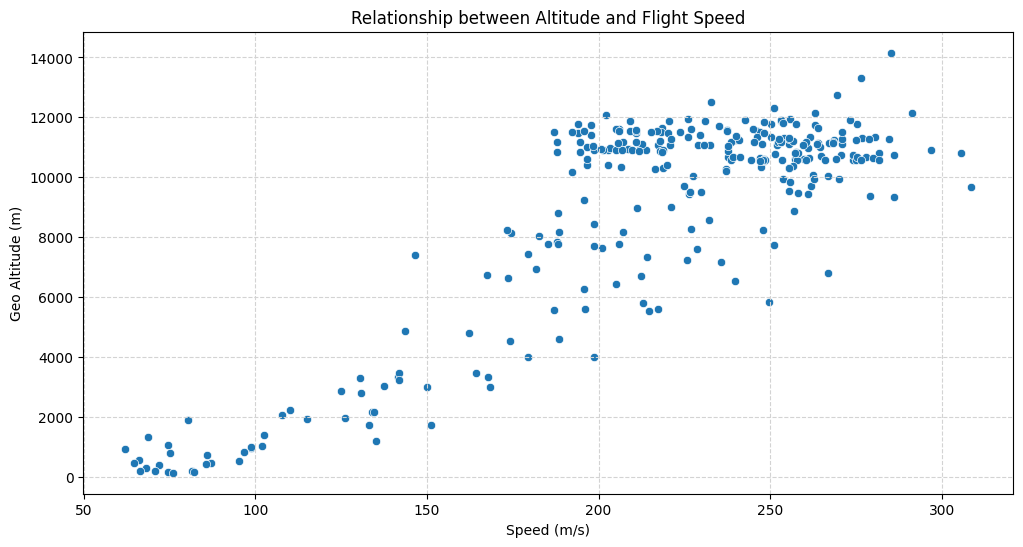

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(air_traffic, x='velocity', y='geo_altitude') # hue='origin_country')
plt.xlabel('Speed (m/s)')
plt.ylabel('Geo Altitude (m)')
plt.grid(color='lightgrey', linestyle='--')
plt.title('Relationship between Altitude and Flight Speed');

In [21]:
print("Number of aircraft in flight:", len(data['states']))
print("First plane:", data['states'][0][1],"comes from:", data['states'][0][2])

Number of aircraft in flight: 319
First plane: WMT991   comes from: Hungary


In [22]:
import plotly.graph_objects as go

df_clean = df.dropna(subset=["latitude", "longitude", "heading"]).copy()

df_clean["text"] = (
    "✈️ <b>Callsign:</b> " + df_clean["callsign"].astype(str) + "<br>" +
    "<b>Origin:</b> " + df_clean["origin_country"].astype(str) + "<br>" +
    "<b>Velocity:</b> " + df_clean["velocity"].astype(str) + " m/s<br>" +
    "<b>Direction:</b> " + df_clean["heading"].astype(str) + "°"
)

map_center = {
    "lat": df_clean["latitude"].mean(),
    "lon": df_clean["longitude"].mean()
}

fig = go.Figure()

fig.add_trace(go.Scattermap(
    lat=df_clean["latitude"],
    lon=df_clean["longitude"],
    mode="markers",
    marker=go.scattermap.Marker(
        size=20,
        symbol="airport",  # Mapbox airplane icon
        angle=-df_clean["heading"],  # icon rotation
        color="dodgerblue"
    ),
    text=df_clean["text"],
    hoverinfo="text"
))

fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        center=map_center,
        zoom=5
    ),
    margin={"r":0,"t":0,"l":0,"b":0},
    height=700,
    title="🛰️ Aerei sopra l’Italia (OpenSky API)"
)

fig.show()


**To be continue**